# Algoritmi e Architetture per il Calcolo ad Alte Prestazioni

__Marco Cioci__ - 10694772, __Francesco Rosnati__ - 10562427, __Luca Tramacere__ - 10676881



## Challenge 2


---

#### Task
The goal is to implement an algorithm to find the i-th order statistic in a vector in linear time in the worst-case scenario. The function takes as input the vector of `n` elements and `i` parameter of the order statistic wanted. It returns as  output the value of the searched element.

---

### Algorithm & Functions Description

#### **select**
**select** function implements a selection algorithm based on the _median of medians_ technique to find a _pivot_, which is then used to partition the array around the _pivot_ itself, then it recursively finds the sought-after element.

```
int select(std::vector<int> &vect, int p, int q, int i) // select the ith order statistic
{
    if (p == q)
        return vect[p];

    std::vector<int> medVector = mediansVector(vect, p, q);

    int pivot = select(medVector, 0, medVector.size() - 1, medVector.size() / 2);

    int lessNum = 0, greatNum = 0, pivNum = 0; // number of elements less than, greater than and equal to the pivot

    pivotPartition(vect, pivot, p, q, lessNum, greatNum, pivNum);

    int k = lessNum + 1;

    if (i == k)
        return pivot;
    else if (i < k)
        return select(vect, p, p + lessNum - 1, i);
    else
        return select(vect, p + lessNum + 1, q, i - k);
}
```

The function takes as input a vector of integer elements, with the initial index p and the final index q, along with the integer i that identifies the i-th ordered statistics to be found. The vector is passed by reference to allow direct modification and avoid unnecessary memory allocation/deallocation operations that could compromise performance.

The initial phase of the function is the base case of recursion, where the median of medians is calculated. This is done by first generating a vector of medians using the mediansVector function, followed by the recursive call of the select function on this vector to find the pivot. Subsequently, the vector is partitioned around the pivot, into a section with values ​​less than the pivot, followed by the pivot itself, and finally a section with values ​​greater than the pivot.

This process is handled by the partition function, which keeps track of the counters lessNum, greatNum, and pivNum, indicating respectively the elements less than, equal to, and greater than the pivot. The integer k represents the k-th element of the vector, assuming the role of pivot. If k is equal to i, the searched element is found; otherwise, the recursive select function is called with updated indices for the section before or after the pivot, depending on whether the i-th element is before or after the pivot. In the section following the pivot, elements equal to the pivot are also included, excluding only the pivot itself.  




#### **mediansVector**
**mediansVector** function creates and returns the vector of medians of the input vector passed to it.



```
std::vector<int> mediansVector(std::vector<int> &vect, int p, int q) // return vector of medians of the 5 entries blocks
{
    if ((q - p + 1) < 5)
    {
        std::vector<int> medVect;
        medVect.push_back(vect[(p + q) / 2]);
        return medVect;
    }

    int blockNum = (q - p + 1) / 5;

    std::vector<int> medVect(blockNum);

    for (int i = 0; i < blockNum; ++i)
    {
        medVect[i] = medianFiveEntries(vect, p + i * 5);
    }
    return medVect;
}
```
The function considers all groups of 5 elements from the input vector and calculates the median for each group, placing it in a specifically created vector, which is then returned to the calling function. Since it's a function recursively called by **select**, the input vector may have fewer than 5 elements, so we have a check that returns an element of that vector as the median in such cases.

The median of each group of 5 elements is calculated using the **medianFiveEntries** function, which sorts the group and returns the middle element.


It was initially thought possible to _parallelize_ the process of calculating the vector's medians using OpenMP, in order to speed up execution. From testing it turned out to be slower than sequential version, probably due to the time processors need to communicate with each other (_communication overhead_).



#### **medianFiveEntries**
The function takes as input the initial vector and the index of the first of the 5 elements that will be sorted, and it returns the median.



```
int medianFiveEntries(std::vector<int> &vect, int i) // sort 5 entries vector from i to i+4 and return the median
{
    if (vect[i + 1] < vect[i])
    {
        swapElements(vect, i, i + 1);
    }
    if (vect[i + 3] < vect[i + 2])
    {
        swapElements(vect, i + 2, i + 3);
    }
    if (vect[i + 3] < vect[i + 1])
    {
        swapElements(vect, i, i + 2);
        swapElements(vect, i + 1, i + 3);
    }
    if (vect[i + 4] < vect[i + 1])
    {
        if (vect[i + 4] < vect[i])
        {
            moveElement(vect, i + 4, i);
            swapElements(vect, i + 4, i + 3);
        }
        else
        {
            moveElement(vect, i + 4, i + 1);
            swapElements(vect, i + 4, i + 3);
        }
    }
    else
    {
        if (vect[i + 4] < vect[i + 3])
        {
            moveElement(vect, i + 4, i + 2);
            swapElements(vect, i + 4, i + 3);
        }
        else
        {
            moveElement(vect, i + 4, i + 3);
            swapElements(vect, i + 4, i + 2);
        }
    }
    if (vect[i + 4] < vect[i + 1])
    {
        if (vect[i + 4] < vect[i])
        {
            moveElement(vect, i + 4, i);
        }
        else
        {
            moveElement(vect, i + 4, i + 1);
        }
    }
    else
    {
        if (vect[i + 4] < vect[i + 2])
        {
            moveElement(vect, i + 4, i + 2);
        }
        else
        {
            moveElement(vect, i + 4, i + 3);
        }
    }
    return vect[i + 2]; // return the median of the 5 entries
}
```

Sorting method that minimizes the number of comparisons between elements, up to a maximum of 7, has been adopted and called **medianFiveElements**.

At first separate tests were conducted for traditional sorting methods (mergeSort, insertionSort, bubbleSort, quickSort) on arrays of 5 elements, generally highlighting better results for quickSort. After testing it within the __select__ algorithm, it emerged that **medianFiveElements** is the _most efficient_ choice.

Sorting is performed using two functions, **moveElement** and **swapElements**. The first moves an element of the array from one position to another, adjusting the other elements accordingly; the second swaps two elements, more efficiently than the standard library's swap function.  

At the end of the process, the 5 elements are sorted, and the central element is returned.



#### **pivotPartition**
**pivotPartition** function takes as input a vector and a pivot and returns the partitioned vector: elements smaller than the pivot will be put on the left and elements larger on it's right.  
Note that in case there are elements that are equal to the pivot, they will be put one after the other.


```
void pivotPartition(std::vector<int> &vect, int pivot, int p, int q, int &lessNum, int &greatNum, int &pivNum) // partition the vector around the pivot
{
    int temp;
    for (int i = p; i <= q; ++i)
    {
        if (vect[i] > pivot)
        {
            greatNum++;
        }
        else if (vect[i] < pivot)
        {
            temp = vect[i];
            vect[i] = vect[p + lessNum + pivNum];
            vect[p + lessNum + pivNum] = vect[p + lessNum];
            vect[p + lessNum] = temp;
            lessNum++;
        }
        else // vect[j] == pivot
        {
            vect[i] = vect[p + lessNum + pivNum];
            vect[p + lessNum + pivNum] = pivot;
            pivNum++;
        }
    }
}
```

This function implements an algorithm based on the utilization of element counters, named *lessNum*, *greatNum*, and *pivNum*, which are passed by reference to allow external access and modification outside the **pivotPartition** function. These counters are created by the calling function and will be used in other contexts outside of the current function.

The arrangement of conditional *if* statements has been structured to maximize the efficiency of the algorithm, initially placing the check for greater or lesser relationship with the pivot, and finally addressing the less frequent case of equality with the pivot. Such arrangement aims to _minimize the overall number of iterations_, thus contributing to optimizing the overall performance of the function.


---

### Test Cases
To demonstrate the validity of our algorithm, we have selected specific test cases.
- __First Test__: Vector of one million elements sorted and without repetitions.
- __Second Test__: Vector of one million elements unsorted and without repetitions.
- __Third Test__: Vector of one million elements unsorted and with random repetitions.
- __Fourth Test__: Vector of one million random elements in a given range, unsorted.

Test cases results are shown ahead on the terminal during the execution.



### Results table
Finally the objective is to plot the execution time trend against array size. This involves saving time measurements and corresponding array sizes into a CSV file, which will then be visualized using Matplotlib in the provided Python script.

---



###select.cpp

In [1]:
%%writefile testScript.cpp
#include <algorithm>
#include <chrono>
#include <fstream>
#include <iostream>
#include <random>
#include <vector>

void swapElements(std::vector<int> &vect, int i, int j) // swap two elements in a vector
{
    int temp = vect[i];
    vect[i] = vect[j];
    vect[j] = temp;
}

void fillVector(int size, std::vector<int> &vect) // ordered vector of int
{
    for (int i = 0; i < size; ++i)
    {
        vect.push_back(i);
    }
}

void fillVectorWithDuplicates(int size, std::vector<int> &vect) // vector of int with duplicates
{
    for (int i = 0; i < size; ++i)
    {
        vect.push_back(i % 10);
    }
}

void sortVector(std::vector<int> &vect) // sort vector
{
    std::sort(vect.begin(), vect.end());
}

void fillVectorWithOnes(int size, std::vector<int> &vect) // vector of 1s
{
    for (int i = 0; i < size; ++i)
    {
        vect.push_back(1);
    }
}

void fillOppositeVector(int size, std::vector<int> &vect) // inverse-ordered vector of int
{
    for (int i = size; i > 0; --i)
    {
        vect.push_back(i);
    }
}

void fillVectorWithRand(int size, std::vector<int> &vect) // vector with elements greater than N
{
    for (int i = 0; i < size; ++i)
    {
        vect.push_back(rand() % (size * 100));
    }
}

void printVector(std::vector<int> &vect) // print vector
{
    for (int i = 0; i < vect.size(); ++i)
    {
        std::cout << vect[i] << " ";
    }
    std::cout << std::endl;
}

void shuffleVector(std::vector<int> &vect, int seed) // shuffle vector elements
{
    std::shuffle(vect.begin(), vect.end(), std::default_random_engine(seed));
}

void moveElement(std::vector<int> &vect, int fromIndex,
                 int toIndex) // move an element in a vector in medianFiveEntries function
{
    int valueToMove = vect[fromIndex]; // temporarily store the element to be moved
    if (fromIndex < toIndex)           // move elements to the right
    {
        for (int i = fromIndex; i < toIndex; ++i)
        {
            vect[i] = vect[i + 1];
        }
    }
    else // move elements to the left
    {
        for (int i = fromIndex; i > toIndex; --i)
        {
            vect[i] = vect[i - 1];
        }
    }

    vect[toIndex] = valueToMove; // place the element at the new position
}

int medianFiveEntries(std::vector<int> &vect, int i) // sort 5 entries vector from i to i+4 and return the median
{
    if (vect[i + 1] < vect[i])
    {
        swapElements(vect, i, i + 1);
    }
    if (vect[i + 3] < vect[i + 2])
    {
        swapElements(vect, i + 2, i + 3);
    }
    if (vect[i + 3] < vect[i + 1])
    {
        swapElements(vect, i, i + 2);
        swapElements(vect, i + 1, i + 3);
    }
    if (vect[i + 4] < vect[i + 1])
    {
        if (vect[i + 4] < vect[i])
        {
            moveElement(vect, i + 4, i);
            swapElements(vect, i + 4, i + 3);
        }
        else
        {
            moveElement(vect, i + 4, i + 1);
            swapElements(vect, i + 4, i + 3);
        }
    }
    else
    {
        if (vect[i + 4] < vect[i + 3])
        {
            moveElement(vect, i + 4, i + 2);
            swapElements(vect, i + 4, i + 3);
        }
        else
        {
            moveElement(vect, i + 4, i + 3);
            swapElements(vect, i + 4, i + 2);
        }
    }
    if (vect[i + 4] < vect[i + 1])
    {
        if (vect[i + 4] < vect[i])
        {
            moveElement(vect, i + 4, i);
        }
        else
        {
            moveElement(vect, i + 4, i + 1);
        }
    }
    else
    {
        if (vect[i + 4] < vect[i + 2])
        {
            moveElement(vect, i + 4, i + 2);
        }
        else
        {
            moveElement(vect, i + 4, i + 3);
        }
    }
    return vect[i + 2]; // return the median of the 5 entries
}

std::vector<int> mediansVector(std::vector<int> &vect, int p, int q) // return vector of medians of the 5 entries blocks
{
    if ((q - p + 1) < 5)
    {
        std::vector<int> medVect;
        medVect.push_back(vect[(p + q) / 2]);
        return medVect;
    }
    int blockNum = (q - p + 1) / 5;
    std::vector<int> medVect(blockNum);
    for (int i = 0; i < blockNum; ++i)
    {
        medVect[i] = medianFiveEntries(vect, p + i * 5);
    }
    return medVect;
}

void pivotPartition(std::vector<int> &vect, int pivot, int p, int q, int &lessNum, int &greatNum,
                    int &pivNum) // partition the vector around the pivot
{
    int temp;
    for (int i = p; i <= q; ++i)
    {
        if (vect[i] > pivot)
        {
            greatNum++;
        }
        else if (vect[i] < pivot)
        {
            temp = vect[i];
            vect[i] = vect[p + lessNum + pivNum];
            vect[p + lessNum + pivNum] = vect[p + lessNum];
            vect[p + lessNum] = temp;
            lessNum++;
        }
        else // vect[j] == pivot
        {
            vect[i] = vect[p + lessNum + pivNum];
            vect[p + lessNum + pivNum] = pivot;
            pivNum++;
        }
    }
}

int select(std::vector<int> &vect, int p, int q, int i) // select the ith order statistic
{
    if (p == q)
        return vect[p];

    std::vector<int> medVector = mediansVector(vect, p, q);
    int pivot = select(medVector, 0, medVector.size() - 1, medVector.size() / 2);
    int lessNum = 0, greatNum = 0, pivNum = 0; // number of elements less than, greater than and equal to the pivot
    pivotPartition(vect, pivot, p, q, lessNum, greatNum, pivNum);
    int k = lessNum + 1;

    if (i == k)
        return pivot;
    else if (i < k)
        return select(vect, p, p + lessNum - 1, i);
    else
        return select(vect, p + lessNum + 1, q, i - k);
}

void tableResults(int M, int seed)
{
    std::random_device rd;
    std::mt19937 generator(rd());

    std::remove("data.csv");        // remove any previous version of the CSV file
    std::ofstream file("data.csv"); // open the CSV file for writing

    if (!file.is_open()) // check if the file opened successfully
    {
        std::cout << "File doesn't exist. Creating a new file." << std::endl; // file doesn't exist, create it
        file.open("data.csv", std::ofstream::out | std::ofstream::trunc);
    }

    std::cout << "Generating data..." << std::endl;
    for (int N = 1; N < M; N += M / 1000)
    {
        if (N % (M / 10) == 1)
        {
            std::cout << "Progress: " << N / (M / 10) * 10 << "%" << std::endl;
        }

        std::vector<int> vect;
        fillVector(N, vect);
        shuffleVector(vect, seed);

        std::uniform_int_distribution<int> distribution(1,
                                                        N); // define uniform distribution for integers between 1 and N
        int rand_i = distribution(generator);               // generate random integer between 1 and N

        auto start = std::chrono::high_resolution_clock::now();
        int x = select(vect, 0, N - 1, rand_i);
        auto end = std::chrono::high_resolution_clock::now();
        auto duration = std::chrono::duration_cast<std::chrono::nanoseconds>(end - start);

        file << N << "," << duration.count() << std::endl;
    }
    std::cout << "Progress: 100%" << std::endl << std::endl << "data.csv is ready!" << std::endl;
    file.close();
}

#define N 10000
#define i N / 4 * 3
#define M 1000000

int main()
{
    int seed = 280424;

    // first we create a vector with integers from 0 to N-1 in order
    std::vector<int> vect;
    fillVector(N, vect);
    std::cout << "First vector: no duplicates" << std::endl;
    std::cout << "N = " << N << std::endl;
    std::cout << "i = " << i << std::endl << std::endl;

    // the i-th smallest element can be retrieved trivially by vect[i-1]
    std::cout << "The i-th smallest element can be retrieved trivially by vect[i-1] because it's generated in order"
              << std::endl;
    std::cout << "In this case the " << i << "th element is: " << vect[i - 1] << std::endl << std::endl;

    // let's see if the select function can retrieve the correct i-th order statistic in a ordered vector with no
    // duplicates
    std::cout << "Result using the 'select' function on the ordered vector:" << std::endl;

    auto startOrd = std::chrono::high_resolution_clock::now();
    int x = select(vect, 0, N - 1, i);
    auto endOrd = std::chrono::high_resolution_clock::now();
    auto durationOrd = std::chrono::duration_cast<std::chrono::nanoseconds>(endOrd - startOrd);

    std::cout << x << std::endl;
    std::cout << "Time taken: " << durationOrd.count() << " nanoseconds" << std::endl << std::endl;

    // now we shuffle the vector
    shuffleVector(vect, seed);
    // let's see if the result is the same
    std::cout << "Result using the 'select' function on the same vector shuffled:" << std::endl;

    auto startShuff = std::chrono::high_resolution_clock::now();
    int y = select(vect, 0, N - 1, i);
    auto endShuff = std::chrono::high_resolution_clock::now();
    auto durationShuff = std::chrono::duration_cast<std::chrono::nanoseconds>(endShuff - startShuff);

    std::cout << y << std::endl;
    std::cout << "Time taken: " << durationShuff.count() << " nanoseconds" << std::endl
              << std::endl
              << "--------------------------------------------------" << std::endl
              << std::endl;

    // now we fill the vector with duplicates
    vect.clear();
    fillVectorWithDuplicates(N, vect);
    std::cout << "Second vector: generated with duplicates" << std::endl;
    std::cout << "N = " << N << std::endl;
    std::cout << "i = " << i << std::endl << std::endl;

    // the i-th smallest element can be retrieved trivially by vect[i-1] AFTER sorting the vector
    std::cout << "The i-th smallest element can be retrieved trivially by vect[i-1] after sorting it" << std::endl;
    sortVector(vect);
    std::cout << "The " << i << "th element is: " << vect[i - 1] << std::endl << std::endl;

    // let's see if the select function can retrieve the correct i-th order statistic in a ordered vector with no
    // duplicates
    std::cout << "Result using the 'select' function on the ordered vector:" << std::endl;

    auto startOrdDup = std::chrono::high_resolution_clock::now();
    int x1 = select(vect, 0, N - 1, i);
    auto endOrdDup = std::chrono::high_resolution_clock::now();
    auto durationOrdDup = std::chrono::duration_cast<std::chrono::nanoseconds>(endOrdDup - startOrdDup);

    std::cout << x1 << std::endl;
    std::cout << "Time taken: " << durationOrdDup.count() << " nanoseconds" << std::endl << std::endl;

    // now we shuffle the vector
    shuffleVector(vect, seed);
    // let's see if the result is the same
    std::cout << "Result using the 'select' function on the same vector shuffled:" << std::endl;

    auto startShuffDup = std::chrono::high_resolution_clock::now();
    int y1 = select(vect, 0, N - 1, i);
    auto endShuffDup = std::chrono::high_resolution_clock::now();
    auto durationShuffDup = std::chrono::duration_cast<std::chrono::nanoseconds>(endShuffDup - startShuffDup);

    std::cout << y1 << std::endl;
    std::cout << "Time taken: " << durationShuffDup.count() << " nanoseconds" << std::endl
              << std::endl
              << "--------------------------------------------------" << std::endl
              << std::endl;

    // now we fill the vector with random elements in range(0, N * 100 )
    vect.clear();
    fillVectorWithRand(N, vect);
    std::cout << "Third vector: vector filled with random elements in range(0 , N * 100)" << std::endl;
    std::cout << "N = " << N << std::endl;
    std::cout << "i = " << i << std::endl << std::endl;

    // the i-th smallest element can be retrieved trivially by vect[i-1] AFTER sorting the vector
    std::cout << "The i-th smallest element can be retrieved trivially by vect[i-1] after sorting it" << std::endl;
    sortVector(vect);
    std::cout << "The " << i << "th element is: " << vect[i - 1] << std::endl << std::endl;

    // let's shuffle it again
    shuffleVector(vect, seed);
    auto startRand = std::chrono::high_resolution_clock::now();
    int z = select(vect, 0, N - 1, i);
    auto endRand = std::chrono::high_resolution_clock::now();
    auto durationRand = std::chrono::duration_cast<std::chrono::nanoseconds>(endRand - startRand);

    // result with select
    std::cout << "Result using the 'select' function on the same vector shuffled:" << std::endl;
    std::cout << z << std::endl;
    std::cout << "Time taken: " << durationRand.count() << " nanoseconds" << std::endl
              << std::endl
              << "--------------------------------------------------" << std::endl
              << std::endl;

    tableResults(M, seed);

    return 0;
}

Writing testScript.cpp


In [2]:
!g++ -o executable.out -std=c++20 -O3 testScript.cpp
!./executable.out

First vector: no duplicates
N = 10000
i = 7500

The i-th smallest element can be retrieved trivially by vect[i-1] because it's generated in order
In this case the 7500th element is: 7499

Result using the 'select' function on the ordered vector:
7499
Time taken: 208283 nanoseconds

Result using the 'select' function on the same vector shuffled:
7499
Time taken: 576942 nanoseconds

--------------------------------------------------

Second vector: generated with duplicates
N = 10000
i = 7500

The i-th smallest element can be retrieved trivially by vect[i-1] after sorting it
The 7500th element is: 7

Result using the 'select' function on the ordered vector:
7
Time taken: 173242738 nanoseconds

Result using the 'select' function on the same vector shuffled:
7
Time taken: 175616351 nanoseconds

--------------------------------------------------

Third vector: vector filled with random elements in range(0 , N * 100)
N = 10000
i = 7500

The i-th smallest element can be retrieved trivially by

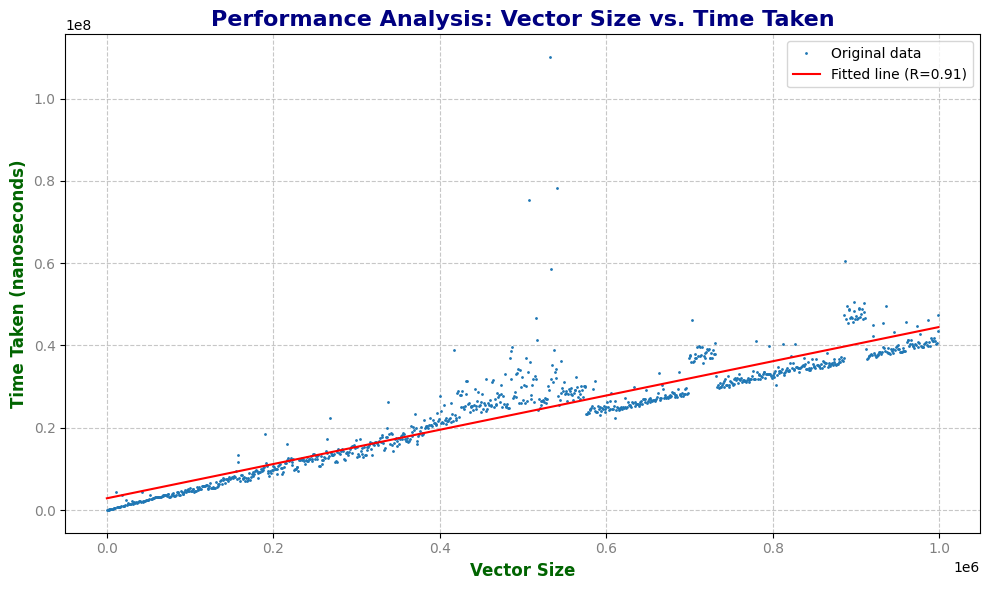

In [3]:
import matplotlib.pyplot as plt
import csv
import numpy as np

def plot_results(csv_file):
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)

    sizes = np.array([int(row[0]) for row in data])
    durations = np.array([int(row[1]) for row in data])

    # Perform linear regression
    A = np.vstack([sizes, np.ones(len(sizes))]).T
    m, c = np.linalg.lstsq(A, durations, rcond=None)[0]

    # Calculate correlation coefficient
    correlation_coefficient = np.corrcoef(sizes, durations)[0, 1]

    # Customizing the plot style and colors
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, durations, 'o', label='Original data', markersize=1)
    plt.plot(sizes, m * sizes + c, 'r', label='Fitted line (R={:.2f})'.format(correlation_coefficient))

    plt.title('Performance Analysis: Vector Size vs. Time Taken', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('Vector Size', fontsize=12, fontweight='bold', color='darkgreen')
    plt.ylabel('Time Taken (nanoseconds)', fontsize=12, fontweight='bold', color='darkgreen')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(fontsize=10, color='gray')
    plt.yticks(fontsize=10, color='gray')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_results('data.csv')

## Benchmark

The benchmark to test the complexity of the algorithm is performed on two vectors: one sorted and one unsorted.

The complexity should result to be at most O(N).

Note that Google Benchmark returns an approximation of the complexity based on the mean times of the algorithm with different N, so running the benchmark different times could result in slightly different outcomes.  

### Install Google Benchmark

In [4]:
!rm -rf benchmark
!git clone https://github.com/google/benchmark.git
!git clone https://github.com/google/googletest.git benchmark/googletest

Cloning into 'benchmark'...
remote: Enumerating objects: 8559, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 8559 (delta 66), reused 108 (delta 44), pack-reused 8405
Receiving objects: 100% (8559/8559), 2.77 MiB | 18.31 MiB/s, done.
Resolving deltas: 100% (5708/5708), done.
Cloning into 'benchmark/googletest'...
remote: Enumerating objects: 27461, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 27461 (delta 0), reused 4 (delta 0), pack-reused 27455
Receiving objects: 100% (27461/27461), 12.59 MiB | 21.41 MiB/s, done.
Resolving deltas: 100% (20410/20410), done.


In [5]:
!rm -rf benchmark/build
!cmake -E make_directory "benchmark/build"
!cmake -E chdir "benchmark/build" cmake -DCMAKE_BUILD_TYPE=Release ..
!cmake --build "benchmark/build" --config Release --target install

-- The CXX compiler identification is GNU 11.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Failed to find LLVM FileCheck
-- Found Git: /usr/bin/git (found version "2.34.1") 
-- Google Benchmark version: v1.8.3-73-gbc946b91, normalized to 1.8.3.73
-- Looking for shm_open in rt
-- Looking for shm_open in rt - found
-- Performing Test HAVE_CXX_FLAG_WALL
-- Performing Test HAVE_CXX_FLAG_WALL - Success
-- Performing Test HAVE_CXX_FLAG_WEXTRA
-- Performing Test HAVE_CXX_FLAG_WEXTRA - Success
-- Performing Test HAVE_CXX_FLAG_WSHADOW
-- Performing Test HAVE_CXX_FLAG_WSHADOW - Success
-- Performing Test HAVE_CXX_FLAG_WFLOAT_EQUAL
-- Performing Test HAVE_CXX_FLAG_WFLOAT_EQUAL - Success
-- Performing Test HAVE_CXX_FLAG_WOLD_STYLE_CAST
-- Performing Test HAVE_CXX_FLAG_WOLD_STYLE_CAST - Success
-- Performing Test HAVE_CXX_FLAG_WCO

### Write and run the benchmark

In [180]:
%%writefile challenge.cpp

#include <benchmark/benchmark.h>
#include <iostream>
#include <vector>
#include <algorithm>
#include <random>
#include <chrono>
#include <fstream>

void swapElements(std::vector<int> &vect, int i, int j) // swap two elements in a vector
{
    int temp = vect[i];
    vect[i] = vect[j];
    vect[j] = temp;
}

void fillVector(int size, std::vector<int> &vect) // ordered vector of int
{
    for (int i = 0; i < size; ++i)
    {
        vect.push_back(i);
    }
}

void fillVectorWithDuplicates(int size, std::vector<int> &vect) // vector of int with duplicates
{
    for (int i = 0; i < size; ++i)
    {
        vect.push_back(i % 10);
    }
}

void sortVector(std::vector<int> &vect) // sort vector
{
    std::sort(vect.begin(), vect.end());
}

void fillVectorWithOnes(int size, std::vector<int> &vect) // vector of 1s
{
    for (int i = 0; i < size; ++i)
    {
        vect.push_back(1);
    }
}

void fillOppositeVector(int size, std::vector<int> &vect) // inverse-ordered vector of int
{
    for (int i = size; i > 0; --i)
    {
        vect.push_back(i);
    }
}

void printVector(std::vector<int> &vect) // print vector
{
    for (int i = 0; i < vect.size(); ++i)
    {
        std::cout << vect[i] << " ";
    }
    std::cout << std::endl;
}

void shuffleVector(std::vector<int> &vect, int seed) // shuffle vector elements
{
    std::shuffle(vect.begin(), vect.end(), std::default_random_engine(seed));
}

void moveElement(std::vector<int> &vect, int fromIndex, int toIndex) // move an element in a vector in medianFiveEntries function
{
    int valueToMove = vect[fromIndex]; // temporarily store the element to be moved
    if (fromIndex < toIndex)           // move elements to the right
    {
        for (int i = fromIndex; i < toIndex; ++i)
        {
            vect[i] = vect[i + 1];
        }
    }
    else // move elements to the left
    {
        for (int i = fromIndex; i > toIndex; --i)
        {
            vect[i] = vect[i - 1];
        }
    }

    vect[toIndex] = valueToMove; // place the element at the new position
}

int medianFiveEntries(std::vector<int> &vect, int i) // sort 5 entries vector from i to i+4 and return the median
{
    if (vect[i + 1] < vect[i])
    {
        swapElements(vect, i, i + 1);
    }
    if (vect[i + 3] < vect[i + 2])
    {
        swapElements(vect, i + 2, i + 3);
    }
    if (vect[i + 3] < vect[i + 1])
    {
        swapElements(vect, i, i + 2);
        swapElements(vect, i + 1, i + 3);
    }
    if (vect[i + 4] < vect[i + 1])
    {
        if (vect[i + 4] < vect[i])
        {
            moveElement(vect, i + 4, i);
            swapElements(vect, i + 4, i + 3);
        }
        else
        {
            moveElement(vect, i + 4, i + 1);
            swapElements(vect, i + 4, i + 3);
        }
    }
    else
    {
        if (vect[i + 4] < vect[i + 3])
        {
            moveElement(vect, i + 4, i + 2);
            swapElements(vect, i + 4, i + 3);
        }
        else
        {
            moveElement(vect, i + 4, i + 3);
            swapElements(vect, i + 4, i + 2);
        }
    }
    if (vect[i + 4] < vect[i + 1])
    {
        if (vect[i + 4] < vect[i])
        {
            moveElement(vect, i + 4, i);
        }
        else
        {
            moveElement(vect, i + 4, i + 1);
        }
    }
    else
    {
        if (vect[i + 4] < vect[i + 2])
        {
            moveElement(vect, i + 4, i + 2);
        }
        else
        {
            moveElement(vect, i + 4, i + 3);
        }
    }
    return vect[i + 2]; // return the median of the 5 entries
}

std::vector<int> mediansVector(std::vector<int> &vect, int p, int q) // return vector of medians of the 5 entries blocks
{
    if ((q - p + 1) < 5)
    {
        std::vector<int> medVect;
        medVect.push_back(vect[(p + q) / 2]);
        return medVect;
    }
    int blockNum = (q - p + 1) / 5;
    std::vector<int> medVect(blockNum);
    for (int i = 0; i < blockNum; ++i)
    {
        medVect[i] = medianFiveEntries(vect, p + i * 5);
    }
    return medVect;
}

void pivotPartition(std::vector<int> &vect, int pivot, int p, int q, int &lessNum, int &greatNum, int &pivNum) // partition the vector around the pivot
{
    int temp;
    for (int i = p; i <= q; ++i)
    {
        if (vect[i] > pivot)
        {
            greatNum++;
        }
        else if (vect[i] < pivot)
        {
            temp = vect[i];
            vect[i] = vect[p + lessNum + pivNum];
            vect[p + lessNum + pivNum] = vect[p + lessNum];
            vect[p + lessNum] = temp;
            lessNum++;
        }
        else // vect[j] == pivot
        {
            vect[i] = vect[p + lessNum + pivNum];
            vect[p + lessNum + pivNum] = pivot;
            pivNum++;
        }
    }
}

int select(std::vector<int> &vect, int p, int q, int i) // select the ith order statistic
{
    if (p == q)
        return vect[p];

    std::vector<int> medVector = mediansVector(vect, p, q);
    int pivot = select(medVector, 0, medVector.size() - 1, medVector.size() / 2);
    int lessNum = 0, greatNum = 0, pivNum = 0; // number of elements less than, greater than and equal to the pivot
    pivotPartition(vect, pivot, p, q, lessNum, greatNum, pivNum);
    int k = lessNum + 1;

    if (i == k)
        return pivot;
    else if (i < k)
        return select(vect, p, p + lessNum - 1, i);
    else
        return select(vect, p + lessNum + 1, q, i - k);
}


// Benchmark function for the shuffed vector
static void BM_select_shuffled(benchmark::State& state)
{
    int size = state.range(0);
    std::vector<int> vect(size);

    for (int i = 0; i < size; i++)
    {
        vect[i] = i;
    }

    std::shuffle(vect.begin(), vect.end(), std::mt19937{std::random_device{}()});

    for (auto _ : state)
    {
        select(vect, 0, size - 1, round(size / 2));
    }

    state.SetComplexityN(size);
}

// Benchmark function for the sorted vector
static void BM_select_sorted(benchmark::State& state)
{
    int size = state.range(0);
    std::vector<int> vect(size);

    for (int i = 0; i < size; i++)
    {
        vect[i] = i;
    }

    for (auto _ : state)
    {
        select(vect, 0, size - 1, round(size / 2));
    }

    state.SetComplexityN(size);
}



BENCHMARK(BM_select_shuffled)
          ->RangeMultiplier(2)
          ->Range(1, 1 << 23)
          ->MinTime(0.01)
          ->Complexity();
BENCHMARK(BM_select_sorted)
          ->RangeMultiplier(2)
          ->Range(1, 1 << 23 )
          ->MinTime(0.01)
          ->Complexity();


BENCHMARK_MAIN();


Overwriting challenge.cpp


In [181]:
!g++ challenge.cpp -O3 -std=c++20 -isystem benchmark/include -Lbenchmark/build/src -lbenchmark -lpthread -o challenge

In [190]:
!./challenge

2024-04-28T21:44:06+00:00
Running ./challenge
Run on (2 X 2200.21 MHz CPU s)
CPU Caches:
  L1 Data 32 KiB (x1)
  L1 Instruction 32 KiB (x1)
  L2 Unified 256 KiB (x1)
  L3 Unified 56320 KiB (x1)
Load Average: 0.87, 0.65, 0.75
------------------------------------------------------------------------------------
Benchmark                                          Time             CPU   Iterations
------------------------------------------------------------------------------------
BM_select_shuffled/1/min_time:0.010             3.45 ns         3.45 ns      3001289
BM_select_shuffled/2/min_time:0.010             40.0 ns         39.4 ns       361375
BM_select_shuffled/4/min_time:0.010             44.1 ns         44.0 ns       319875
BM_select_shuffled/8/min_time:0.010              156 ns          156 ns        80872
BM_select_shuffled/16/min_time:0.010             404 ns          404 ns        34275
BM_select_shuffled/32/min_time:0.010             426 ns          421 ns        40871
BM_select_

### Benchmark Results
The benchmark results suggest that the complexity of the __select__ algorithm is `linear` in both the chosen test cases: _ordered vector_ and _shuffled vector_.
It's possible also to evince that the _ordered vector_ case tends to be faster, this is due to the fact that during the computation of the median of the blocks of five entries, there is no need to sort the block, all such computations are spared in this case.


Worse performance is always correlated to a higher RMS showing that rather than having a high number of cases running slow, there are just exception cases that have a runtime much slower than the average one.